Import Libraries


In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Image Path

In [28]:
image_bgr=cv2.imread(("/content/mario_assignment1.jpeg"))
image_rgb=cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
image_gray= cv2.cvtColor(image_bgr, cv2.COLOR_BGRA2GRAY)

In [29]:
print(image_gray.dtype)


uint8


CNN


In [30]:
def apply_padding(image, pad_size):
    return np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='reflect')

def manual_convolve(image, kernel):
    ksize = kernel.shape[0]
    pad_size = ksize // 2
    padded = apply_padding(image, pad_size)
    result = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+ksize, j:j+ksize]
            result[i, j] = np.sum(region * kernel)
    return result
    #Sobel Edge Detection
def apply_sobel(image):
    Gx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]], dtype=np.float32)
    Gy = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]], dtype=np.float32)

    grad_x = manual_convolve(image, Gx)
    grad_y = manual_convolve(image, Gy)

    sobel_mag = np.sqrt(grad_x**2 + grad_y**2)
    sobel_mag /= sobel_mag.max()  # Normalize to [0, 1]
    #edge_map = (sobel_mag >= 0.1).astype(np.uint8)
    return sobel_mag

#Scharr Edge Detection
def apply_scharr(image):
    Gx = np.array([[ -3, 0,  3],
                   [-10, 0, 10],
                   [ -3, 0,  3]], dtype=np.float32)

    Gy = np.array([[ -3, -10, -3],
                   [  0,   0,  0],
                   [  3,  10,  3]], dtype=np.float32)

    grad_x = manual_convolve(image, Gx)
    grad_y = manual_convolve(image, Gy)

    scharr_mag = np.sqrt(grad_x**2 + grad_y**2)
    scharr_mag /= scharr_mag.max()  # Normalize to [0, 1]
    #edge_map = (scharr_mag >= 0.1).astype(np.uint8)
    return scharr_mag

gaussian_kernel=1/16*np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])




In [31]:
blurred = manual_convolve(image_gray, gaussian_kernel)/255.0
# Apply Sobel and Scharr
sobel_edges = apply_sobel(blurred)
scharr_edges = apply_scharr(blurred)


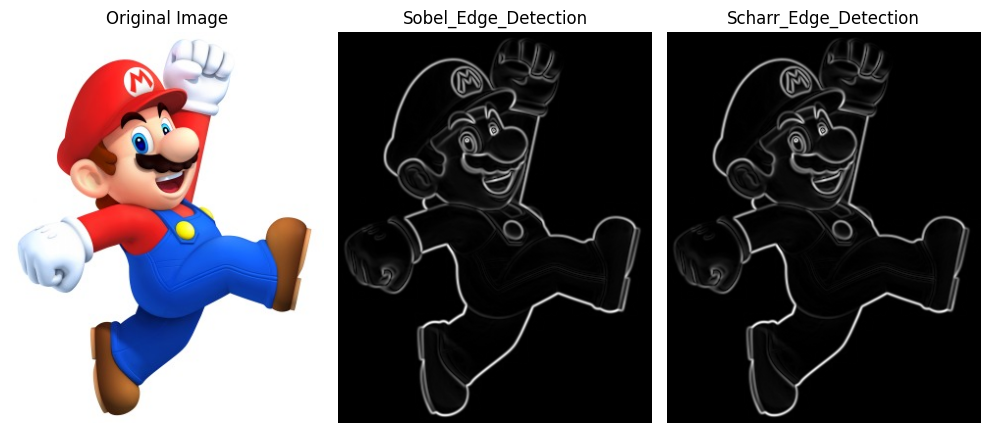

In [32]:
# Plot the original and edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Sobel_Edge_Detection")
plt.imshow(np.abs(sobel_edges), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Scharr_Edge_Detection")
plt.imshow(np.abs(scharr_edges), cmap='gray')
plt.axis('off')



plt.tight_layout()
plt.show()


With Thresholding

In [50]:
def apply_padding_th(image, pad_size):
    return np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='reflect')

def manual_convolve_th(image, kernel):
    ksize = kernel.shape[0]
    pad_size = ksize // 2
    padded = apply_padding(image, pad_size)
    result = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+ksize, j:j+ksize]
            result[i, j] = np.sum(region * kernel)
    return result
    #Sobel Edge Detection
def apply_sobel_th(image):
    Gx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]], dtype=np.float32)
    Gy = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]], dtype=np.float32)

    grad_x = manual_convolve(image, Gx)
    grad_y = manual_convolve(image, Gy)

    sobel_mag = np.sqrt(grad_x**2 + grad_y**2)
    sobel_mag /= sobel_mag.max()  # Normalize to [0, 1]
    edge_map = (sobel_mag >= 0.2).astype(np.uint8)
    return edge_map

#Scharr Edge Detection
def apply_scharr_th(image):
    Gx = np.array([[ -3, 0,  3],
                   [-10, 0, 10],
                   [ -3, 0,  3]], dtype=np.float32)

    Gy = np.array([[ -3, -10, -3],
                   [  0,   0,  0],
                   [  3,  10,  3]], dtype=np.float32)

    grad_x = manual_convolve(image, Gx)
    grad_y = manual_convolve(image, Gy)

    scharr_mag = np.sqrt(grad_x**2 + grad_y**2)
    scharr_mag /= scharr_mag.max()  # Normalize to [0, 1]
    edge_map = (scharr_mag >= 0.2).astype(np.uint8)
    return edge_map

gaussian_kernel=1/16*np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])




In [51]:
blurred_th = manual_convolve(image_gray, gaussian_kernel)/255.0
# Apply Sobel and Scharr
sobel_edges_th = apply_sobel_th(blurred_th)
scharr_edges_th = apply_scharr_th(blurred_th)


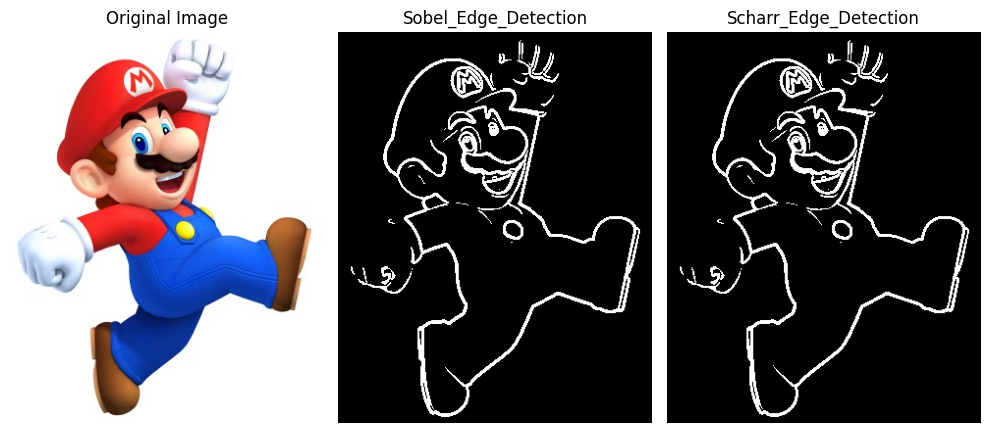

In [52]:
# Plot the original and edge-detected images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Sobel_Edge_Detection")
plt.imshow(np.abs(sobel_edges_th), cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Scharr_Edge_Detection")
plt.imshow(np.abs(scharr_edges_th), cmap='gray')
plt.axis('off')



plt.tight_layout()
plt.show()
